In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('임베딩_클러스터링.csv')
df2 = pd.read_csv('241129_전처리.csv')

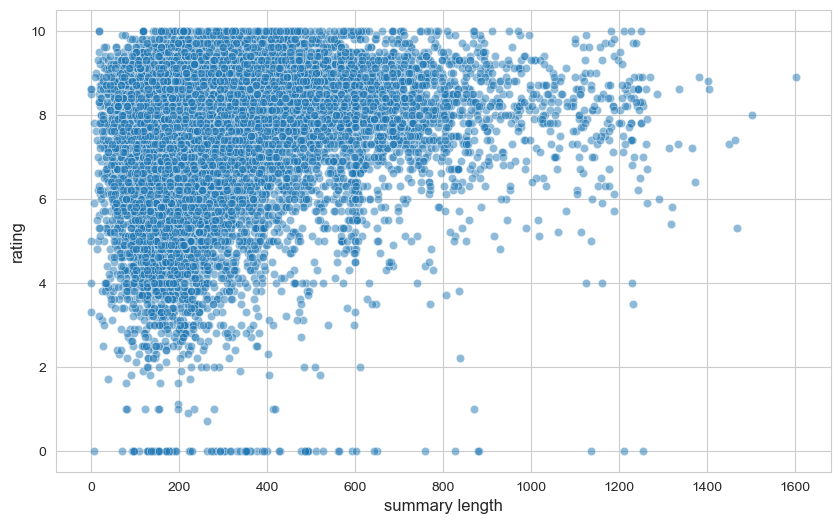

In [2]:
import seaborn as sns


# 1) Seaborn 스타일 지정
sns.set_style('whitegrid')

# 2) 샘플 그래프
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['줄거리_길이'], y=df['평점'], data=df, alpha=0.5, edgecolor='white')

plt.xlabel('summary length', fontsize=12)
plt.ylabel('rating', fontsize=12)

plt.show()

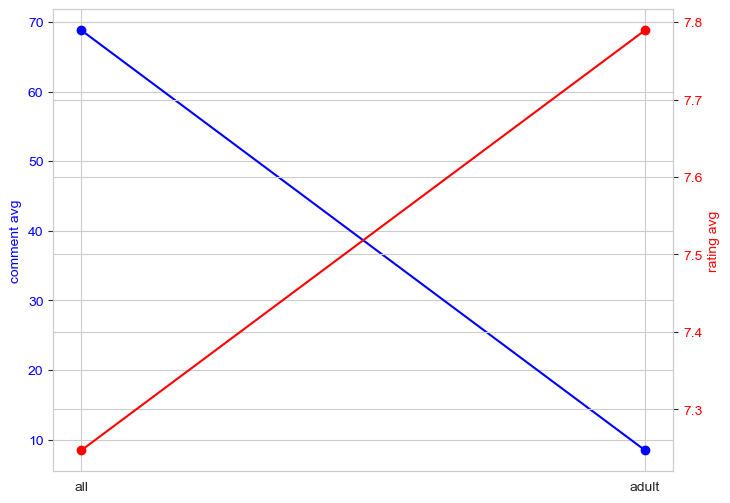

In [3]:
df2['댓글수'] = df2['댓글수'].str.replace(',','')
df2['댓글수'] = pd.to_numeric(df2['댓글수'])
grouped = df2.groupby('청불여부').agg({
    '댓글수': 'mean',
    '평점': 'mean'
}).reset_index()

# x축 범주(0,1)와 각 y값(댓글수 평균, 평점 평균)
x = grouped['청불여부']
y1 = grouped['댓글수']
y2 = grouped['평점']

# 실제 그리기
fig, ax1 = plt.subplots(figsize=(8, 6))

# 첫 번째 축(왼쪽 y축)에 댓글 수
ax1.plot(x, y1, color='blue', marker='o', label='comment avg')
ax1.set_ylabel('comment avg', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 축(오른쪽 y축)에 평점
ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', marker='o', label='rating avg')
ax2.set_ylabel('rating avg', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# x축 범주가 0,1로 되어 있다면, 눈금 대신 범주명으로 보이도록 설정
# 예: 0 -> "미작성", 1 -> "작성"
plt.xticks(ticks=[0,1], labels=['all', 'adult'])

plt.show()

In [4]:
df3 = df2.copy()
genre_mapping = {
    '로맨스': 'romance',
    '로판': 'romfan',
    '현판': 'modfan',
    '무협': 'action',
    '라이트노벨': 'lightnovel',
    '미스터리': 'mystery',
    '판타지': 'fantasy'
}


df3['장르'] = df3['장르'].replace(genre_mapping)

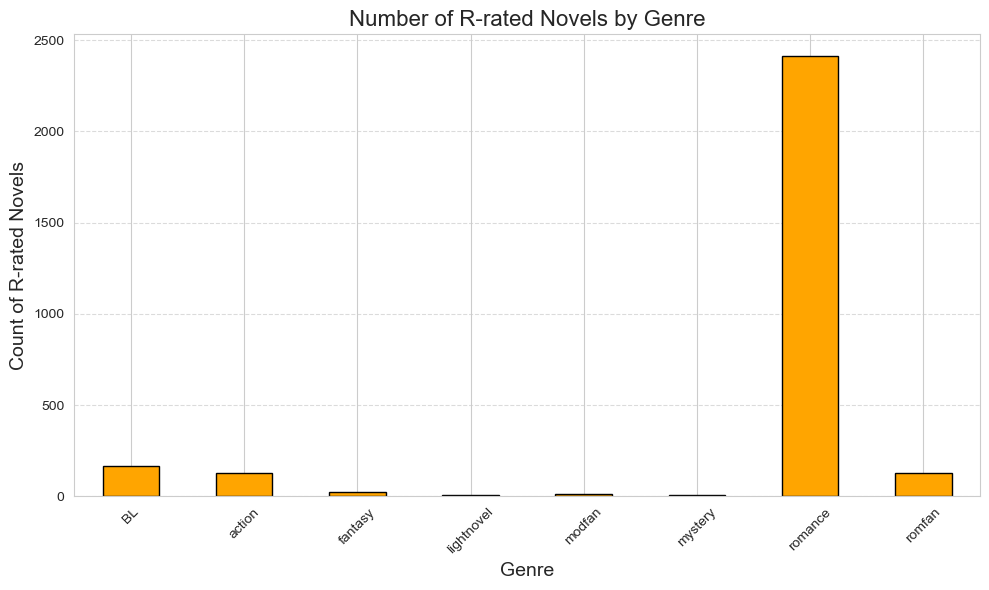

In [5]:
genre_adult_counts = df3[df3['청불여부'] == 1].groupby('장르').size().sort_values(ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
genre_adult_counts.sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Number of R-rated Novels by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count of R-rated Novels", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
df3['평점'] = df3['평점'].apply(lambda x: 1 if x >= 7.5 else 0)
good = df3[df3['평점'] == 1 ]

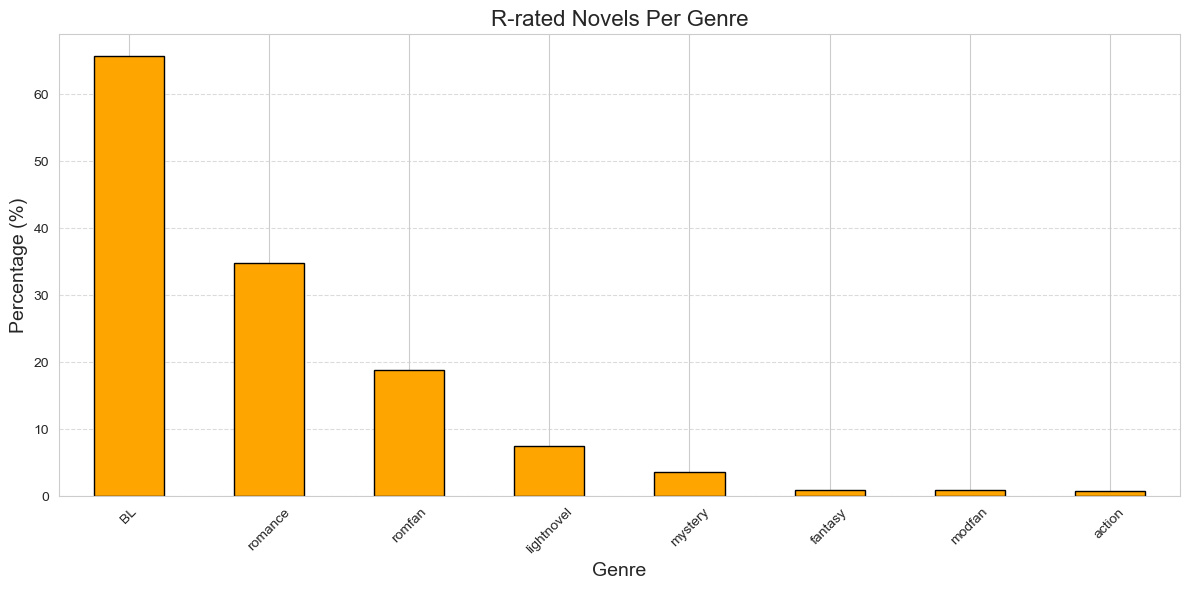

In [7]:
total_counts = good.groupby('장르').size()  # 장르별 총 개수
adult_counts = good[good['청불여부'] == 1].groupby('장르').size()  # 청불여부가 1인 개수

# 청불여부 비율 계산
adult_ratio = (adult_counts / total_counts * 100).fillna(0)  # 퍼센트 계산 및 NaN을 0으로 처리

# 비율을 내림차순 정렬
adult_ratio = adult_ratio.sort_values(ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
adult_ratio.plot(kind='bar', color='orange', edgecolor='black')
plt.title("R-rated Novels Per Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()